In [1]:
import pandas as pd
import numpy as np

import sklearn.linear_model as lm
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

D:\Anaconda2_4.4.0\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
## import visualization packages
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

In [3]:
from __future__ import print_function
from __future__ import division

In [4]:
%matplotlib inline
plt.style.use('seaborn-white')

In [5]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

### Simple Linear Regression
Simple linear regression predicts a quantitative response $Y$ on the basis of a single predictor variable $X$. It assumes that there is a approximately a linear relationship between $X$ and $Y$. This linear relationship can be represented as;
$$Y \approx \beta_0 +\beta_1X$$
$\beta_0$ and $\beta_1$ represent two unknown constants that represent the _intercept_ and _slope_ terms in the linear model. Together, $\beta_0$ and $\beta_1$ are known as the model _coefficients_ or _parameters_. Once the $\hat\beta_0$ and $\hat\beta_1$ are estimated using training data, it is possible to predict $\hat Y$ using;
$$\hat Y = \hat\beta_0+\hat\beta_1X$$
where $\hat Y$ is a prediction for Y, on a particular value of $X=x$.

#### Estimating the Coefficients
In practice, $\beta_0$ and $\beta_1$ are unknown. We must use the training data to estimate the coefficients $\hat\beta_0$ and $\hat\beta_1$, that results in a line as close as possible to the data points. The most common approach is to use the _least square_ criterion.

#### Residual sum of squares
Let $\hat y = \hat\beta_0+\hat\beta_1X$ be the prediction for Y based on the $i$th value of X. Then $e_i = y_i - \hat y_i$ represent the $i$th residual. That is the difference between the $i$th observed response value and the $i$th response value predicted by the linear model. We define the _residual sum of squares (RSS)_ as;
$$RSS = e_1^2+e_2^2+...+e_n^2$$ or as
$$RSS =(y_1-\hat\beta_0 -\hat\beta_1x_1)^2+ (y_1-\hat\beta_0 -\hat\beta_1x_2)^2+...+(y_1-\hat\beta_0 -\hat\beta_1x_n)^2$$

The lease square approach chooses $\hat\beta_0$ and $\hat\beta_1$ such that RSS is minimized.

#### Simple Linear Regression Fit for Advertising Data.

In [6]:
adv = pd.read_csv('./Advertising.csv',usecols=['TV','radio','newspaper','sales'])
adv.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
X=sm.add_constant(adv['TV'])
y=adv['sales']

linear_model=sm.OLS(y,X).fit()

In [8]:
linear_model.params

const    7.032594
TV       0.047537
dtype: float64

Based on our regression model, $\hat\beta_0$ = 7.03 and $\hat\beta_1$ = 0.0475. According to this approximation, an additional $1,000 spent on TV advetising is associate with selling approximately47.5 additional unit of the product.

In [9]:
x = np.arange(0,300,0.1)
x = sm.add_constant(x)

# Create regression line
reg_line = linear_model.predict(x)

# Predict Y values for given X values 
y_hat = linear_model.predict(X)

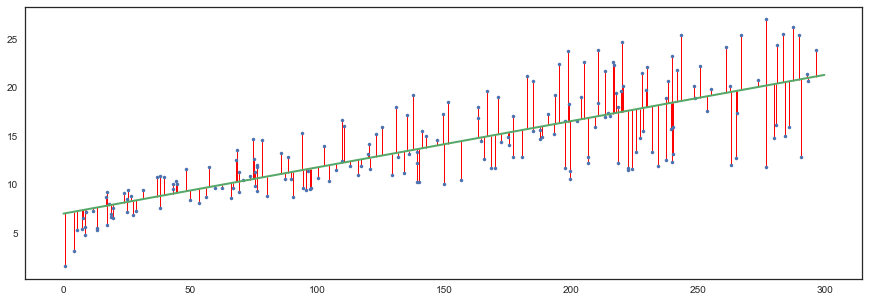

In [10]:
plt.figure(figsize=(15,5))
# Plot observed data (sales,TV data)
plt.plot(adv['TV'], adv['sales'], marker = '.', linestyle = 'None')

# Plot regression line
plt.plot(x[:,1], reg_line, linestyle='-', marker= 'None', linewidth = 2)

# Plot residuals
plt.vlines(adv['TV'], y_hat, adv['sales'],linestyles='-',colors='r', linewidth=1)

In [11]:
# Obtaining the residual value (Residual Sum of Squares)
np.sum(linear_model.resid**2)

2102.5305831313503

In [12]:
intercept= linear_model.params[0]
coef = linear_model.params[1]

#### Plotting the residual squared sum for different $\hat\beta_0$ and $\hat\beta_1$.  
Suppose we compute RSS using for a number of values of $\hat\beta_0$ and $\hat\beta_1$ using the sales as the response variable and TV as the predictor. 

In [13]:
# Create grid coordinates for plotting
B0 = np.linspace(intercept-2,intercept+2, 50)
B1 = np.linspace(coef-0.02,coef+0.02, 50)

xx, yy = np.meshgrid(B0,B1)

In [14]:
error_mesh= np.zeros((B0.size,B1.size))

# Calculating RSS based on grid of coefficients
for (i,j), v in np.ndenumerate(error_mesh):
    error_mesh[i,j] = ((adv['sales']-(xx[i,j]+adv['TV'].ravel()*yy[i,j]))**2).sum()/1000

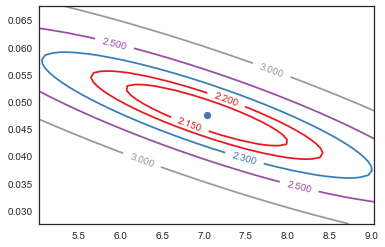

In [15]:
CS = plt.contour(xx,yy,error_mesh, cmap = plt.cm.Set1, levels = [2.15,2.2, 2.3, 2.5, 3])
plt.clabel(CS, inline= True)
plt.scatter(intercept,coef)

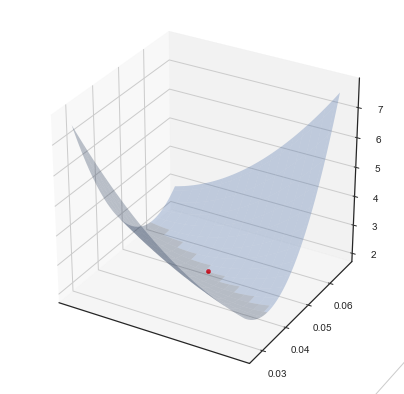

In [16]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111,projection = '3d')
ax.plot_surface(xx, yy, error_mesh, rstride=3, cstride=3, alpha=0.3)
ax.scatter3D(intercept,coef,error_mesh.min(), c='r')
ax.set_yticks([0.03,0.04,0.05,0.06])
ax.set_xticks([12,13,14,15,16]);

### Assessing the Accuracy of the Coefficient Estimates
We assume that the true relationship between X and Y takes the form $Y=f(X)+\epsilon$ for some unknown function $f$. where $\epsilon$ is a mean zero random error term. If $f$ is to be approximated by a linear function, then we can write this relationship as;
$$Y=\beta_0+\beta_1X+\epsilon$$
However, the true relationship may probably not linear, there may be other variables that cause variations in $Y$, and there may be measurement errors. The error term acts as a catch-all for what we miss with this simple model.  

The model $Y=\beta_0+\beta_1X+\epsilon$ defines the _population regression line_, which is the best linear approximation to the true relationship between $X$ and $Y$. In real applications, we will have access to a set of observations from which we can compute the least square line based on the observed data, however, the population regression line is unobservable.

In [17]:
X=np.linspace(-2,2,100)
# Suppose for  -2 <= X <= 2, the true relationship is f(X)=2+3X
true_relationship=2+X*3
# The observed responses generated using the model 
Y= 2+X*3+4*np.random.normal(size=100)

In [18]:
# Creating an linear model based on the observed data
x=sm.add_constant(X)
least_square_line = sm.OLS(Y,x).fit()
print ('Intercept:\t',least_square_line.params[0])
print ('Slop:\t',least_square_line.params[1])

Intercept:	 2.2813026775
Slop:	 2.61483629419


In [19]:
y_hat=least_square_line.predict(x)

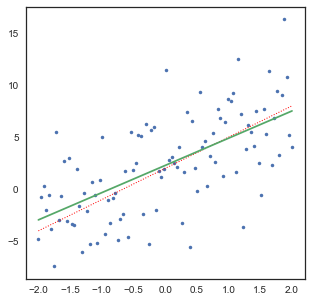

In [20]:
# Comparing the true relationship (population regression line) and the least square line 
plt.figure(figsize=(5,5))
plt.plot(X,Y,marker='.',linestyle='None')
plt.plot(X,true_relationship, linewidth= 1, color='r', linestyle='dotted')

plt.plot(X, least_square_line.predict(x))

$\beta_0$ and $\beta_1$ are unknown coefficients define the population regression line. We seek the estimate these unknown coefficients using $\hat\beta_0$ and $\hat\beta_1$.There estimates define the least square line.

If we estimate $\hat\beta_0$ and $\hat\beta_1$ on the basis of a particular data set, then the estimates won't be exactly equal to $\beta_0$ and $\beta_1$. But if we could average the estimates obtained over a huge number of data sets,then the average of these estimates would be close to the exact values.

When an estimator doesn't systematically over or underestimate the value of the parameter it is estimating the estimator is said to be **Unbiased**

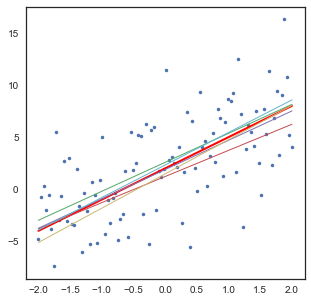

In [21]:
# Comparison between the sample least square lines and the true relationship
plt.figure(figsize=(5,5))
plt.plot(X,Y,marker='.',linestyle='None')
plt.plot(X,true_relationship, linewidth= 2, color='r')

for sample in range(5):
    obs=np.random.randint(0,100,20)
    least_square = sm.OLS(Y[obs],x[obs]).fit()
    plt.plot(X, least_square.predict(x),linestyle='-',linewidth=1)

For a single estimate of $\beta_0$ and $\beta_1$, based on a particular data set $\hat\beta_0$  and $\hat\beta_1$ may  substantially underestimate or overestimate their values. 
We can calculate the standard error associated with $\hat\beta_0$ and $\hat\beta_1$ get a rough idea of how much the estimates will change from sample to sample.

In [22]:
# In statsmodels the standard errors can be obtained by attribute bse
linear_model.bse

const    0.457843
TV       0.002691
dtype: float64

Assuming that the standard errors are Gaussian, we can use the standard errors to estimate a confidence interval for each of the parameteres.

95% confidence interval for $\beta_0$ can be calculated by;
$$\hat\beta_0\pm2.SE(\hat\beta_0)$$
That is, there is approximately a 95% chance that the interval
$$[\hat\beta_0 - 2.SE(\hat\beta_0),\hat\beta_0 + 2.SE(\hat\beta_0)]$$

Similarly, a confidence interval for $\beta_1$, can be calculated by;
$$\hat\beta_1\pm2.SE(\hat\beta_1)$$

In [23]:
# In the case of advertising data, confidence intervals for each parameter can be obtain using the conf_int() method 
linear_model.conf_int()

,0,1
const,6.129719,7.935468
TV,0.042231,0.052843


#### Using standard error for hypothesis test
If the standard error is large and the estimated value small then the estimator might not be significantly different than 0. We can perform an hypothesis test to check if the parameters calculated is different from zero.
In order to perform this we define the **null hypothesis**;
$$H_0 \text{: There is no relationship between X and Y, i.e.  }\beta_1\neq0$$

and the **Alternate hypotesis**:
$$H_a \text{: There is some relationship between X and Y, i.e. } \beta_1=0$$

To test the null hypothesis, we determine whether $\hat\beta_1$ is sufficiently far from zero. In practice, to achieve this we will compute the *t-statistic,* which measures the number of standard deviations the $\hat\beta_1$ is away from 0, and compute the probability (*p-value*) of observing a number value equal to or larger *absolute t* value. A small p-value indicates that it is unlikely to observe a $\hat\beta_1$ due to randomness, and that the null hypothesis is probably false. Hence, if we see a small p-value, then we can infer that there is an association between the predictor and the response.

In [24]:
# Viewing the p values associated with the estimated parameters
linear_model.pvalues

const    1.406300e-35
TV       1.467390e-42
dtype: float64

For the Advertising data, the coefficients for $\hat\beta_0$ and $\hat\beta_1$ are very large relative to their standard errors, so the t-statistics are also large. The probability of seeing such values if $H_0$ is true is virtually zero. Hence, we can conclude that $\beta_0\neq0$ and $\beta_1\neq0$

### Assessing Model Accuracy of the Model
The quality of a linear regression fit is typically assessed using the _residual standard error_ (RSE) and the $R^2$ statistic.

#### Residual standard error (RSE)
The linear model for each observation 
The $RSE$ is an estimate of the average amount that the response will deviate from the true regression line. This is computed using the formula
$$RSE=\sqrt{\frac{1}{n-2}RSS}= \sqrt{\frac{1}{n-2}\sum^n_{i=1}(y_i-\hat y_i)^2}$$
The RSE is considered a measure of the _lack of fit_ of the model to the data. If the predictions obtained using the model are very close to the true outcome, that is, if $\hat y_i \approx y_i$ then RSE will be small, and can we conclude that the model fit the data very well.

In [25]:
RSS = np.sum(linear_model.resid**2)

def RSE(linear_model):
    RSS = np.sum(linear_model.resid**2)
    nob = linear_model.nobs
    npr = linear_model.df_model
    
    ## np.sqrt(RSS/(df_resid))
    
    return np.sqrt(RSS/(nob-npr-1))

RSE(linear_model)

3.2586563686504619

In [26]:
linear_model.rsquared

0.61187505085007099

For the *advertising* data, we see that the RSE is 3.26, which mean that actual sales in each market deviates from the true regression line on average by approximately 3,260 unites. In the advertising data set, the mean value of sales over all markets is approximately 14,000 units, so the percentage error is 3,260/14,000 = 23%

#### $R^2$ Statistic
The RSE provides an absolute measure of lack of fit, bit since it is measured in the units of $Y$, it is not always clear what constitutes a good $RSE$. The $R^2$ statistic provides an alternative measure of fit in the form of a _proportion_, and always takes on a value between 0 and 1. We calculate $R^2$, using the formula;

$$R^2=\frac{TSS-RSS}{TSS}$$
Where $TSS=\sum(y_i-\bar y)^2$ is the _total sum of squares_. TSS measures the total variance in the response $Y$, and can be thought of as the amount of variability inherent in the response before the regression is performed. RSS measures the amount of variability that is left unexplained by the regression model.

$R^2$ tells us what percentage of the total variance ($TSS$) has been 'explained' by the model, or what percentage of the variation ($TSS$) was removed by using the model.

An $R^2$ statistic that is close to 1, indicates that a large proportion of the variability in the response has been explained by the regression. A number near 0 indicates that the regression did not explain much of the variability in the response.

The $R^2$ statistic has an interpretational advantage over RSE since unlike the $RSE$, it always lies between 0 and 1. 

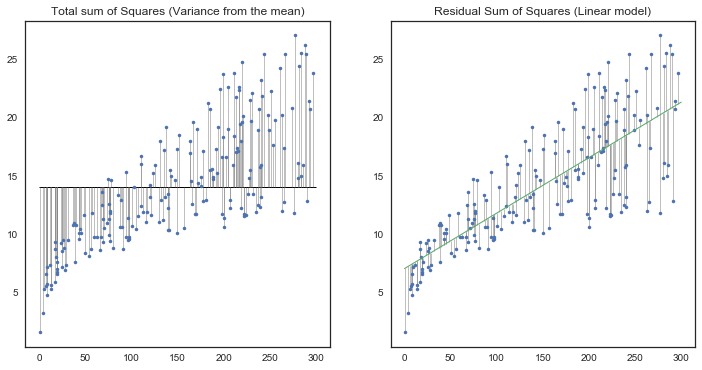

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize={12,6})

ax1.plot(adv['TV'],adv['sales'],'.')
ax1.hlines(adv['sales'].mean(), 0, 300, linewidth=1)
ax1.vlines(adv['TV'], adv['sales'].mean(), adv['sales'], linewidth=1, colors='grey', alpha=0.5)
ax1.set_title('Total sum of Squares (Variance from the mean)')

x = np.arange(0,300,.1)
ax2.plot(adv['TV'],adv['sales'],'.')
ax2.plot(x, x*linear_model.params[1]+linear_model.params[0], linewidth=1)
ax2.vlines(adv['TV'],adv['TV']*linear_model.params[1]+linear_model.params[0], adv['sales'], linewidth=1, colors='grey', alpha=0.5)
ax2.set_title('Residual Sum of Squares (Linear model)')

### Multiple Linear Regression
Simple linear regression is useful approach for predicting a response on the basis of a single predictor variable. However, in practice we oftan have more than one predictor variable. One option is to run seperate simple linear regressions,each using one of the variable as the predictor.

In [28]:
X=sm.add_constant(adv['radio'])
lm_radio=sm.OLS(adv['sales'],X).fit()
lm_radio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Thu, 08 Mar 2018   Prob (F-statistic):           4.35e-19
Time:                        11:56:47   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
X=sm.add_constant(adv['newspaper'])
lm_newspaper=sm.OLS(adv['sales'],X).fit()
lm_newspaper.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Thu, 08 Mar 2018   Prob (F-statistic):            0.00115
Time:                        11:57:01   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3514      0.621     19.876      0.000      11.126      13.577
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Instead of fitting a seperate simple linear regression model for each predictor, a better approach is to extend the simple linear regression model so that it can directly accommodate multiple predictors. In general, supposing tha we have $p$ distinct predictors, the multiple linear regression model takes the form:
$$Y=\beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p+\epsilon$$  
where $X_j$ represents the $j_th$ predictor and $\beta_j$ quantifies the association between that variable and the response. For the advertising example, the regression formula becomes;
$$sales=\beta_0+\beta_1\times{TV}+\beta_2\times{radio}+\beta_3\times{newspaper}+\epsilon$$

As with the simple linear regression, the regression coefficients $\beta_0,\beta_1,...,\beta_p$ is unknown, and must be estimated. Given the estimates $\hat\beta_0,\hat\beta_1,...,\hat\beta_p$ we can make preditions using the formula
$$\hat y=\hat\beta_0+\hat\beta_1x_1+\hat\beta_2x_2+...+\hat\beta_px_p$$

The parameters are estimated using the same least square approach as with simple linear regression. We choose $\beta_0,\beta_1,...,\beta_p$ to minimize the sum of squared residuals
$$RSS=\sum^n_i=1(y_i-\hat y_i)^2$$

#### Running Multiple regression for Advertising data

In [29]:
X=sm.add_constant(adv[['radio','TV','newspaper']],1)
multiple_lm=sm.OLS(adv['sales'],X).fit()
multiple_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 08 Mar 2018   Prob (F-statistic):           1.58e-96
Time:                        11:56:55   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
radio          0.1885      0.009     21.893      0.000       0.172       0.206
TV             0.0458      0.001     32.809      0.000       0.043       0.049
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Comparing the coefficient estimates to those displayed calcuated for simple regression coefficient estimates, we can note that the multiple regression coefficients for TV and radio are pretty similar to those of the simple regression. However, while the newspaper regression coefficient estimate is non-zero in the simple regression model, the coefficient estimate for newspaper in the multiple regression model is close to zero and the corresponding p-value is no longer significant.

|                       | TV      | Radio    | NewsPaper |
|:----------------------|:--------|:---------|:----------|
|Simple Regression      | 0.0475  | 0.2025   | 0.0547    |
|Multiple Regression    | 0.0458  | 0.1885   | 0.0010    |


This difference stems from the fact that in the simple regression case, the slop term represents the average effect of a \$1,000 in newspaper advertising, ignoring other predictors. In contrast, in the multiple regression setting, the coefficient for newspaper represents the average effect of increasing newspaper spending by $1,000 while holding TV and radio spend fixed.

In [32]:
adv.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


If we consider the correlation matrix for the three predictor variables and response variables, the correlation between _radio_ and _newpaper_ is 0.35.  This reveals a tendency to spend more on newspaper advertising in markets where more is spent on radio advertising.

### Checking if there is a relationship between the response and the prodictors
In the multiple regression setting with $p$ predictors, in order to  determine whether there is a relationship between the response and predictor we need to check whether all the regression coeffients are zero, i.e, whether $\beta_1=\beta_2=...=\beta_p=0$. As with simple linear regression setting, we use a hypothesis test to answer this question. We test the null hypothesis,
$$H_0: \beta_1=\beta_2=...=\beta_p=0$$
versus the alternative
$$H_a:\text{at least one }\beta_j \text{ is non-zero}$$
This hypothesis is performed by computing the F-statistic,
$$F=\frac{(TSS-RSS)/p}{RSS/(n-p-1)}$$

In [31]:
RSS = np.sum(multiple_lm.resid**2)
print ('Residual Standard Error(RSE) :\t',RSE(multiple_lm))
print ('R Squared :\t',multiple_lm.rsquared)
print ('F-statistic :\t',multiple_lm.fvalue)

Residual Standard Error(RSE) :	 1.68551037341
R Squared :	 0.897210638179
F-statistic :	 570.270703659


When there is no relationship between the respose and predictors, the F-statistic can be expected to take on a value close to 1. On the other hand, if $H_a$ is true, then we expect $F$ to be greater than 1. To determine whether or not to reject $H_0$, the p-value for the F-statistics can be calculated using the F-distribution for the given values of $n$ and $p$.

In [33]:
multiple_lm.f_pvalue

1.575227256092437e-96

For the advertising data, the p-value associated with the F-statistic is essentially zero, so we have strong evidence that the atleast one of the predictors is associated with increased sales.  
The use of F-statistic to test for any association between the predictors and the response is appropriate when the number of predictors ($p$) is relatively small. If $p>n$ then there are more coefficients $\beta_j$ to estimate than observations from which to estimate them. In this case we cannot even fit the multiple linear regression model using least squares.

### Deciding on Important Variables
The first step in a multiple regression analysis is to compute the F-statistics and the associated p value.  Based on the _p-value_ we can conclude whether atleast one of the predictors is related to the response.
It is possible that all of the predictors are associated with the response, but more often the case that the response is only related to a subset of predictors. The task of determining the predictors associated with the response, in order to fit a single model involving only these predictors, is refered to as **_variable selection_**.

#### Classical Approach for Variable Selection
* __Forward Selection__  
Starts with a _null model_, a model that contains an intercept but no predictors. We run _p_ simple linear regression models for each of the predictors and add to the null model the variable that results in the lowest RSS. Next two-variable regression models are run using the selected variable  and each of the remaining variables. In each iternation, the variable resulting in the lowest RSS is added to the model.

* __Backward Selection__  

* __Mixed Selection__



### Model Fit
In multiple linear regression, $R^2$ equals the square of the correlation between the response and the fitted linear model.
An $R^2$ value close to 1 indicates that the model explains a large portion of the variancee in the response variable.
The model using the _TV_ and _radio_ has a  $R^2$ of  0.89719.  Whereas, the model using all three advertising media has a $R^2$ of  0.89721.

In [34]:
X=sm.add_constant(adv[['radio','TV']])
lm_radio_tv=sm.OLS(adv['sales'],X).fit()
print ('R squared value for linear model with only radio and TV:\n',lm_radio_tv.rsquared)

X=sm.add_constant(adv[['radio','TV','newspaper']])
multiple_lm=sm.OLS(adv['sales'],X).fit()
multiple_lm.rsquared
print ('R squared value for linear model with all three variables:\n',multiple_lm.rsquared)

R squared value for linear model with only radio and TV:
 0.897194261083
R squared value for linear model with all three variables:
 0.897210638179


The model that contains only _TV_ and _radio_ as predictors has an RSE of 1.681, and the model that also contains _newspaper_ as a predictor has an RSE of 1.686

In [35]:
print (RSE(lm_radio_tv))
print (RSE(multiple_lm))

1.68136091251
1.68551037341


### Other Considerations in Regression Model

#### Qualitative Predictors
**Predictors with only two levels**  
If a qualitative predictor has two _levels_, or possible values, then incorporating it to the regression model can be done using a _dummy variable_ that takes on two possible numarical values. For example, in the case of gender, we can create a new variable that takes the form
$$x_i= \begin{cases}\text{1 if }\textit{i}\text{th person is female},\\
\text{0 if }\textit{i}\text{th person is male}\end{cases}$$

The decision to code females as 1 and males as 0 is arbtrary, and has no effect on the regression fit, but does alter the interpretation of the coefficients. The final prediction will be identical regardless of the coding scheme used.

**Predictors with More than Two Levels**  
When a qualitative predictor has more than two levels, a single dummy variable cannot represent all possible values. In this situation, we can create additional dummy variables. For example, for ethnicity variable having three level: Asian, Caucasian, African American can be represented using two dummy variables;
$$x_i1= \begin{cases}\text{1 if }\textit{i}\text{th person is Caucasian},\\
\text{0 if }\textit{i}\text{th person is not Caucasian}\end{cases}$$
and the second dummy variable
$$x_i1= \begin{cases}\text{1 if }\textit{i}\text{th person is Asia},\\
\text{0 if }\textit{i}\text{th person is not Asian}\end{cases}$$

In order to obtain the model,
$$y_i=\beta_0 + \beta_1{x_i1} + \beta_2{x_i2}+\epsilon_i=  \begin{cases}{\beta_0 + \beta_1 + \epsilon_i}\text{ if }\textit{i}\text{th person is Caucasian},\\
{\beta_0 + \beta_2 + \epsilon_i}\text{ if }\textit{i}\text{th person is not Asian}\\
{\beta_0 + \epsilon_i}\text{ if }\textit{i}\text{th person is African American}\\
\end{cases}\\
$$
The level with no dummy variable is known as the baseline. There will always be one fewer dummy variables than the number of levels.

### Creating Dummy Variables with Pandas DF
A object/categorical variable can be substituted by dummy variables using *pd.get_dummies* function.

In [36]:
credit=pd.read_csv('./Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [38]:
credit=pd.concat([credit,pd.get_dummies(credit[['Gender','Ethnicity']],prefix=['Gender','Ethnicity'])],axis=1)
credit.drop(['Gender_Female','Ethnicity_African American'],axis=1,inplace=True)

Creating least squares coefficient estimates associated with the regression of balance onto ethnicity by passing two dummy variables for ethnicity. $\beta_0$ (intercept) can be interpreted as the average credit card balance for African Americans, $\beta_1$ can be interpreted as the difference in the average balance between the Asian and the African American categories. $\beta_2$ can be taken as the difference in the average balance between the Caucasian and the African American categories.  
The level without any dummy variable, African American, is known as the baseline.

In [39]:
x=sm.add_constant(credit[['Ethnicity_Asian','Ethnicity_Caucasian']])
Y=credit['Balance']
credit_model=sm.OLS(Y,x).fit()
credit_model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,531.0000,46.319,11.464,0.000,439.939,622.061
Ethnicity_Asian,-18.6863,65.021,-0.287,0.774,-146.515,109.142
Ethnicity_Caucasian,-12.5025,56.681,-0.221,0.826,-123.935,98.930


As per the model, the estimated balance for the _baseline_, African American, is \$531.00. It is estimated that Asian category will have \$18.69 less debt than the African American category, and that the Caucasian category will have \$12.50 less debt than the African American category.

The p-values associated with the coefficient estimates for the two dummy variables are very large, suggesting no statistical evidence of a real difference between the ethnicities.  However, the coefficients and their p-values depend on the choice of dummy variable coding, so rather than relying on the individual coefficients, an F-test can be used to test $H_0:\beta_1=\beta_2=0$.

In [40]:
credit_model.f_pvalue

0.95749188811995789

The F-test has a p-value of 0.96, indicating that we cannot reject the null hypothisis that there is no relationship between the balance and ethnicity.

#### Removing the Additive Assumption
The additive assumption states that changes in a predictor $X_j$ on the response $Y$ is independent of the values of the other predictors. 

Given a standard linear regression model;
$$Y=\beta_0+\beta_1X_1+\beta_1X_2$$
If $X_1$ is increased by one unit, then Y will increase by $\beta_1$ units. Regardless of the value of $X_2$, a one-unit increase in $X_1$ will lead to a $\beta_1$ unit increase in $Y$.

One way to extend this model to allow for the interaction effects is to include a third predictor, _interaction term,_ which is computed as the product to $X_1$ and $X_2$, this results in the model
$$Y=\beta_0+\beta_1X_1+\beta_2X_2+\beta_3X_1X_2+\epsilon$$
Which can be rewrite as;
$$Y=\beta_0+(\beta_1+\beta_3X_2)X_1+\beta_2X_2+\epsilon$$
$$Y=\beta_0+ \tilde \beta_1X_1+\beta_2X_2+\epsilon$$
where $\tilde \beta_1 = \beta_1+\beta_3X_2 $. Since $\tilde \beta_1$ changes with $X_2$, the effect $X_1$ on $Y$ is no longer constant, adjusting $X_2$ will change the impact of $X_1$ on $Y$.


Suppose that an interaction exist between radio and TV in the Advertising example.

In [41]:
# Interaction term
adv['TVxradio']=adv['TV']*adv['radio']

# Creating the linear model
x= sm.add_constant(adv[['TV','radio','TVxradio']])
Y= adv['sales']
interaction_lm=sm.OLS(Y,x).fit()
interaction_lm.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
radio,0.0289,0.009,3.241,0.001,0.011,0.046
TVxradio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


The linear model suggest that model including the interaction term is superior to the model that only contain main effects. The $R^2$ for the model is 96.8% compared to the 89.7% for the model that predicts sales using TV and radio without an interaction term.

The p-value for the interaction term, **TVxradio**, is extreamly low, indicating that there is strong evidence for $H_a:\beta_3 \neq 0$

The concept of interaction can be applied to qualitative variables or a combination of qualitative and quantitative variables. From the Credit dataset we may wish to predict the balance using the income(quantitative) and student (qualitative) variables. In the absence of an interaction term, the model takes the form
$$balance = \beta_0 +\beta_1\times income+\begin{cases}{\beta_2\text{ if the ith person is a student}}\\{\text{0 if the ith person is not a student}}\end{cases}$$

$$balance = \beta_1\times income+\begin{cases}{\beta_0 + \beta_2\text{ if the ith person is a student}}\\{\beta_0 \text{ if the ith person is not a student}}\end{cases}$$

Which effectively gives two parallel lines to the data, one for students and one for non-students. The lines for students and non-students have different intercepts, but the same slope, $\beta_1$. The fact thatthe lines are parallel means that the average effect on balance of a one-unit increase in income does not depend on whether the person is a student or not. This represents potentially serious limitation of the model, since in fact a change in income may have a very different effect on the credit.  


In [42]:
credit['dummy_student']=pd.get_dummies(credit['Student'])['Yes']

In [43]:
X= sm.add_constant(credit[['Income','dummy_student']])
y= credit['Balance']

credit_model_01= sm.OLS(y,X).fit()
credit_model_01.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,211.1430,32.457,6.505,0.000,147.333,274.952
Income,5.9843,0.557,10.751,0.000,4.890,7.079
dummy_student,382.6705,65.311,5.859,0.000,254.272,511.069


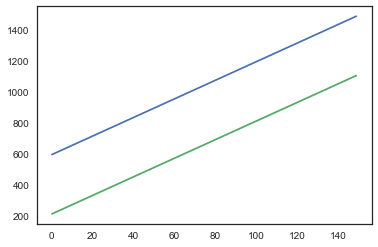

In [44]:
income = np.arange(150)
const = np.ones_like(income)
dummy_std = np.ones_like(income)
dummy_nstd = np.zeros_like(income)

student_bal= np.dot(credit_model_01.params,np.array([const,income,dummy_std]))
non_student = np.dot(credit_model_01.params,np.array([const,income,dummy_nstd]))

plt.plot(income,student_bal)
plt.plot(income,non_student)

This can be addressed by adding an interaction variable, created by multiplying income with the dummy variable for student. The model now becomes;
$$balance = \beta_0 +\beta_1\times income+\begin{cases}{\beta_2 + \beta_3\times income \text{if the ith person is a student}}\\{\text{ 0 if the ith person is not a student}}\end{cases}$$

$$balance = \begin{cases}{(\beta_0 + \beta_2)+ (\beta_1+\beta_3)\times income\text{ if the ith person is a student}}\\{\beta_0+\beta_1\times income \text{ if the ith person is not a student}}\end{cases}$$
Once again, we have two different regression lines for the students and the non-students. But these regression lines have different intercepts, $\beta_0+\beta_2$ versus $\beta_0$, as well as different slopes, $\beta_1+\beta_3$ versus $\beta_1$. This allows for the possibility that changes in income may affect students and non-students differently.

In [45]:
credit['IncomeXstudent']= credit['Income']*credit['dummy_student']

X= sm.add_constant(credit[['Income','dummy_student','IncomeXstudent']])
y= credit['Balance']

credit_model_02= sm.OLS(y,X).fit()
credit_model_02.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,200.6232,33.698,5.953,0.000,134.373,266.873
Income,6.2182,0.592,10.502,0.000,5.054,7.382
dummy_student,476.6758,104.351,4.568,0.000,271.524,681.827
IncomeXstudent,-1.9992,1.731,-1.155,0.249,-5.403,1.404


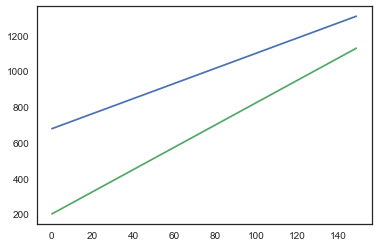

In [46]:
income = np.arange(150)
const = np.ones_like(income)
dummy_std = np.ones_like(income)
dummy_nstd = np.zeros_like(income)


student_bal= np.dot(credit_model_02.params,np.array([const,income,dummy_std, income*dummy_std]))
non_student = np.dot(credit_model_02.params,np.array([const,income,dummy_nstd,income*dummy_nstd]))

plt.plot(income,student_bal)
plt.plot(income,non_student)

#### Non-linear Relatioships
Linear regression model assumes a relationship between the response and predictors. But in some cases, the true relationship between the response and the predictors may be non-linear. Linear model can be etended to accomodate non-linear relationships, using _polynomial regression_.

In [47]:
data_type= {'mpg': np.float,'cylinders': np.int, 'displacement': np.float, 'horsepower': np.float, 'weight': np.float, 'acceleration': np.float, 'year': np.int, 'origin': np.int}
Auto = pd.read_csv('./Auto.csv',dtype=data_type,na_values='?')
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [48]:
Auto.dropna(axis=0, how= 'any',inplace=True)

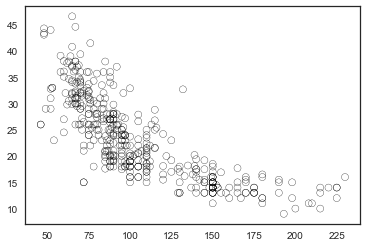

In [49]:
plt.scatter(Auto['horsepower'], Auto['mpg'], facecolors='None', edgecolors='k')

Visual observation of the Auto data suggest a curved relationship. A simple approach for incorporating non-linear associations in a linear model is to include transformed versions of the predictors in the model. For the Auto data the points seems to have a quadratic shape, suggesting a model of the form;

$$mpg = \beta_0+\beta_1\times horsepower+\beta_2\times horsepower^2+\epsilon$$
Although the equation involves predicting _mpg_ using a non-linear function of _horsepower_, this is still a linear model. The above can be thought as a multiple linear regression model with $X_1=horsepower$ and $X_2=horsepower^2$

In [50]:
X= sm.add_constant(np.array([Auto['horsepower'],Auto['horsepower']**2]).T)
y= Auto['mpg']
mpg_model2=sm.OLS(y,X).fit()

In [51]:
mpg_model2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,56.9001,1.800,31.604,0.000,53.360,60.440
x1,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
x2,0.0012,0.000,10.080,0.000,0.001,0.001


Similarly, higher degree polynomials can be added to the model.

In [52]:
X= sm.add_constant(np.array([Auto['horsepower'],Auto['horsepower']**2,Auto['horsepower']**3, Auto['horsepower']**4, Auto['horsepower']**5]).T)
y= Auto['mpg']
mpg_model5=sm.OLS(y,X).fit()

In [53]:
mpg_model5.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-32.2305,28.574,-1.128,0.260,-88.411,23.950
x1,3.7001,1.303,2.840,0.005,1.139,6.262
x2,-0.0714,0.023,-3.170,0.002,-0.116,-0.027
x3,0.0006,0.000,3.206,0.001,0.000,0.001
x4,-2.281e-06,7.24e-07,-3.150,0.002,-3.71e-06,-8.57e-07
x5,3.33e-09,1.09e-09,3.068,0.002,1.2e-09,5.46e-09


In [55]:
x = np.arange(40,225,0.5)
y_hat2= mpg_model2.predict(np.column_stack((np.ones_like(x), x, x**2)))
y_hat5= mpg_model5.predict(np.column_stack((np.ones_like(x), x, x**2, x**3, x**4, x**5)))

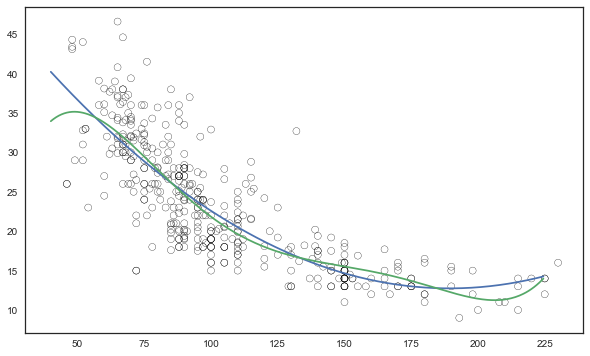

In [56]:
plt.figure(figsize=(10,6))
plt.scatter(Auto['horsepower'], Auto['mpg'], facecolors='None', edgecolors='k')
plt.plot(x,y_hat2)
plt.plot(x,y_hat5)

The model with all polynomials up to fifth degree in the model results in a fit that seems unnecessarily wiggly, which may not lead to a better fit to the data.

#### Non-linearity of the data
The linear regression model assumes that there is a straight-line relationship between the predictor and the response. If the true relationship is not linear, prediction accuracy of the model can be significantly reduced.
_Residual Plots_ are a useful graphical tool for identifying non-linearity. We can plot the residuals versus the predicted (or fitted) values $\hat y_i$. Ideally, the residual plot will show no discernible pattern.

In [57]:
X=sm.add_constant(Auto['horsepower'])
y=Auto['mpg']
mpg_linear = sm.OLS(y,X).fit()
linear_resid = mpg_linear.resid

X=sm.add_constant(np.array([Auto['horsepower'],Auto['horsepower']**2]).T)
y=Auto['mpg']
mpg_order2 = sm.OLS(y,X).fit()
order2_resid = mpg_order2.resid

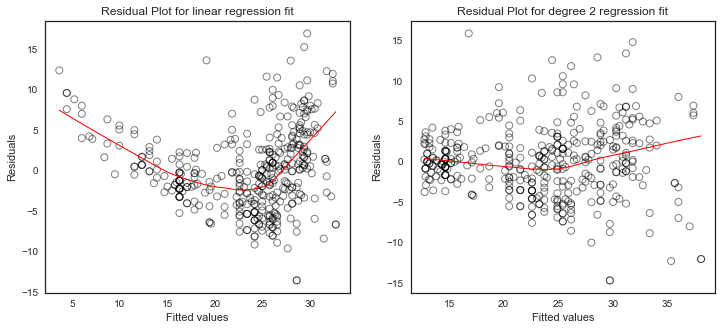

In [58]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.set_title('Residual Plot for linear regression fit')
sns.regplot(mpg_linear.predict(), linear_resid, lowess=True,ax=ax1, line_kws={'color':'r','lw':1},
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5, 'lw':1})

ax2.set_title('Residual Plot for degree 2 regression fit')
sns.regplot(mpg_order2.predict(), order2_resid, lowess=True,ax=ax2, line_kws={'color':'r','lw':1},
           scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5, 'lw':1})

for ax in fig.axes:
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')

If the residual plot indicates that there are non-linear associations in the data, then a simple approach is to use non-linear transformations of the predictors, such as $logX, \sqrt{X}$ and $X^2$, in the regression model.